Presently does not work as desired

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.constants as spc

In [8]:
spc.c

299792458.0

In [72]:
def sim_proj(phi, theta, gtu, altitude, det_altitude, theta_fov=np.deg2rad(11/2), foc_size=1, foc_pix=48, c=spc.c):
#     , foc_pix=48
#     Dt_sec = num_gtu * 2.5 *  spc.micro # seconds
#     Ds = spc.c * Dt_sec
#     Ds = 
#     f = np.sqrt(s**2 - altitude**2)

    t_sec = gtu * 2.5 *  spc.micro # seconds
    s = c * t_sec
    f = np.sin(theta) * s
    
    x = f * np.cos(phi)
    y = f * np.sin(phi)
    
    F = 2 * np.tan(theta_fov)*(altitude - det_altitude)
    
    x_foc = x * foc_size / F 
    x_foc_pix = np.round(x_foc * 48 / foc_size  + 48 / 2)
    
    y_foc = y * foc_size / F
    y_foc_pix = np.round(y_foc  * 48 / foc_size  + 48 / 2)
    
    print('t_sec =', t_sec)
    print('s =', s)
    print('f =', f)
    print('F =', F)
    print('x =', x)
    print('y =', y)
    print('x_foc =', x_foc)
    print('y_foc =', y_foc)
    print('x_foc_pix =', x_foc_pix)
    print('y_foc_pix =', y_foc_pix)
    
    print('-'*50)
    
    return x_foc_pix, y_foc_pix

In [73]:
gtus = list(range(0, 25))
phi = 2.60895609856 # == 149.48 deg #np.deg2rad(170)
theta = 0.77999651432 # == 44.69 deg # np.deg2rad(60)
det_altitude = 27 * spc.kilo # meters
altitude = 5 * spc.kilo # meters

x_foc_pix, y_foc_pix = zip(*[sim_proj(phi, theta, gtu, det_altitude, altitude, c=spc.c/2) for gtu in gtus])

t_sec = 0.0
s = 0.0
f = 0.0
F = 4236.718120691699
x = -0.0
y = 0.0
x_foc = -0.0
y_foc = 0.0
x_foc_pix = 24.0
y_foc_pix = 24.0
--------------------------------------------------
t_sec = 2.4999999999999998e-06
s = 374.7405725
f = 263.54640356348096
F = 4236.718120691699
x = -227.03763830429145
y = 133.83055564576762
x_foc = -0.053588091498337535
y_foc = 0.03158826049629142
x_foc_pix = 21.0
y_foc_pix = 26.0
--------------------------------------------------
t_sec = 4.9999999999999996e-06
s = 749.481145
f = 527.0928071269619
F = 4236.718120691699
x = -454.0752766085829
y = 267.66111129153524
x_foc = -0.10717618299667507
y_foc = 0.06317652099258284
x_foc_pix = 19.0
y_foc_pix = 27.0
--------------------------------------------------
t_sec = 7.499999999999999e-06
s = 1124.2217174999998
f = 790.639210690443
F = 4236.718120691699
x = -681.1129149128744
y = 401.4916669373029
x_foc = -0.16076427449501263
y_foc = 0.09476478148887427
x_foc_pix = 16.0
y_foc_pix = 29.0
-------------------------------

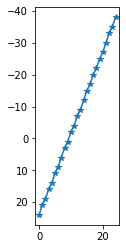

In [74]:
plt.plot(gtus, x_foc_pix, marker='*')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect=1)
plt.show()

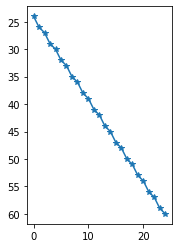

In [75]:
plt.plot(gtus, y_foc_pix, marker='*')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect=1)
plt.show()

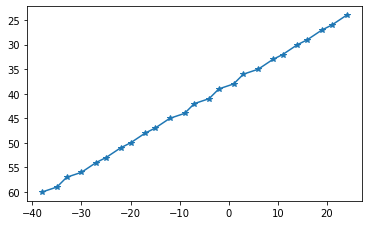

In [77]:
plt.plot(x_foc_pix, y_foc_pix, marker='*')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect=1)
plt.show()

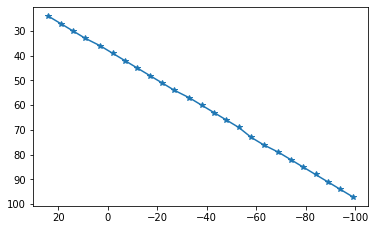

In [71]:
# just to more immitate correct solution
plt.plot(x_foc_pix, y_foc_pix, marker='*')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().set_aspect(aspect=1)
plt.show()

Actually the angle above seems to be 2.609 rad - CORRECT